In [1]:
import fastai; fastai.__version__

'1.0.19'

In [2]:
fastai

<module 'fastai' from '/data/anaconda3/envs/fastaiv1/lib/python3.7/site-packages/fastai/__init__.py'>

In [3]:
from fastai import *
from fastai.vision import *

In [24]:
class ImageRegressionDataset(ImageClassificationBase):
    def __init__(self, fns:FilePathList, y:Collection[Number]):
        super().__init__(fns, classes=[])
        self.y = np.array(y, dtype=np.float32)[:, None]
        self.c = 1
        self.loss_func = F.mse_loss

In [25]:
pdata = Path('/data/cifar10/train/airplane/')

In [26]:
list(pdata.glob('*.png'))[:10]

[PosixPath('/data/cifar10/train/airplane/17015_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/44932_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/43160_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/29620_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/650_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/37872_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/8759_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/20070_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/12121_airplane.png'),
 PosixPath('/data/cifar10/train/airplane/13068_airplane.png')]

In [27]:
n = 100
n_val = 20
fns = list(pdata.glob('*.png'))[:n]
# fns = [str(o) for o in pdata.glob('*.png')][:n]
y = np.random.randn(n)


In [28]:
ds_trn = ImageRegressionDataset(fns[:-n_val], y[:-n_val])
ds_val = ImageRegressionDataset(fns[-n_val:], y[-n_val:])

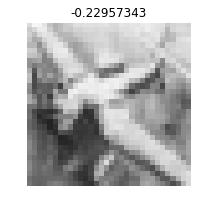

In [41]:
img, y = ds_val[0]
img.show(title=y[0])

In [29]:
data = ImageDataBunch.create(ds_trn, ds_val)

In [30]:
data

In [31]:
data

In [32]:
data.valid_ds

ImageRegressionDataset of len 20

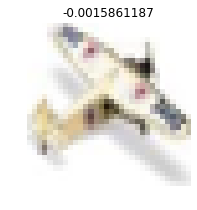

In [33]:

i = np.random.choice(len(data.valid_ds))
img,y = data.valid_ds[i]

img.show(title=y[0])

In [34]:
learn = create_cnn(data, models.resnet18)

In [35]:
learn

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7fcf9552f160>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [36]:
learn.fit(1)

Total time: 00:00
epoch  train_loss  valid_loss
1      2.313975    1.549148    (00:00)



In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(1)